In [14]:
import shutil, random, os
from histolab.slide import SlideSet
from histolab.masks import TissueMask
from histolab.tiler import ScoreTiler
from histolab.scorer import NucleiScorer

In [16]:
slideset_path = '/mnt/d/Lung_progression/Analysis'
processed_images = '/mnt/d/Lung_progression/Processed_images_10x'
dataset = SlideSet(slideset_path, processed_path = processed_images,
                   valid_extensions = ['.ndpi'])

In [17]:
dataset.slides_stats

{'no_of_slides': 112,
 'max_width': {'slide': 'S157_HandE', 'width': 86016},
 'max_height': {'slide': 'S169_HandE', 'height': 83712},
 'max_size': {'slide': 'S169_HandE', 'size': 6514802688},
 'min_width': {'slide': 'S32_HandE', 'width': 8192},
 'min_height': {'slide': 'S28_HandE', 'height': 7168},
 'min_size': {'slide': 'S28_HandE', 'size': 73400320},
 'avg_width': 30774.85714285714,
 'avg_height': 32267.428571428572,
 'avg_size': 1038998381.7142857}

In [18]:
dataset[1].level_magnification_factor(level = 2)

'10.0X'

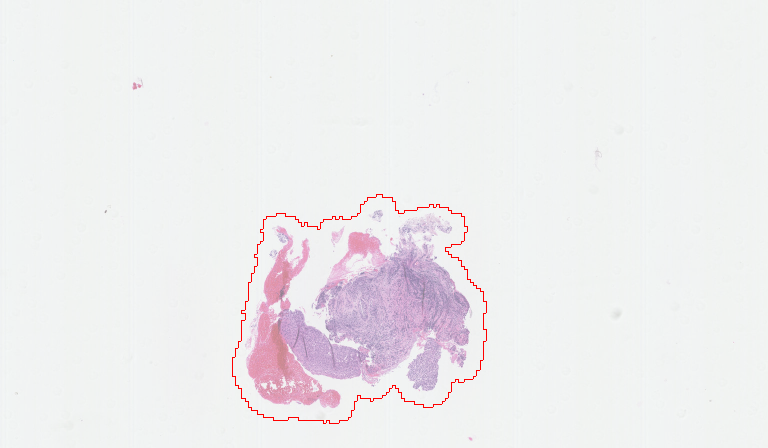

In [19]:
all_tissue_mask = TissueMask()
dataset[1].locate_mask(all_tissue_mask)

In [22]:
scored_tiles_extractor.locate_tiles(slide = dataset[3],
                                   extraction_mask = all_tissue_mask)

NameError: name 'scored_tiles_extractor' is not defined

In [23]:
# Loop over all and order in folders

for slide in dataset:
    s = slide.name
    r = s[0:s.find('_')]
    
    #Create extractor in order to change prefix
    
    scored_tiles_extractor = ScoreTiler(
        scorer = NucleiScorer(),
        tile_size=(256, 256),
        n_tiles=500,
        level=1,
        check_tissue=True,
        tissue_percent=50.0,
        pixel_overlap=0, # default
        prefix="{}/{}_".format(r, r), # Creates folder with S10, and S10 prefix for files
        suffix=".png" # default
            )
    
    scored_tiles_extractor.extract(slide)

/home/alon/anaconda3/envs/ml/lib/python3.9/site-packages/histolab/filters/image_filters_functional.py:210: UserWarning: Input image must be RGB. NOTE: the image will be converted to RGB before HED conversion.
  hed = rgb_to_hed(img)


In [238]:
dirpath = '/mnt/d/Lung_progression/dataset_filtered'
random.seed(1)
foldernames = random.sample(os.listdir(dirpath), 20)

foldernames.sort()
foldernames

['S1',
 'S134',
 'S140',
 'S145',
 'S148',
 'S150',
 'S16',
 'S165',
 'S3',
 'S38',
 'S46',
 'S53',
 'S57',
 'S59',
 'S6',
 'S69',
 'S74',
 'S80',
 'S86',
 'S97']